In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Reads each of the raw data files, drops any rows with missing values, duplicates, or rows that are not from JFK, and saves the cleaned data to a new file in the clean directory
for yy in range(10,19):
    for mm in range(1,13):
        if yy == 18 and mm == 8:
            break
        if mm < 10:
            mm = f'0{mm}'

        df = pd.read_csv(f'data/raw/JFK_{mm}_{yy}.csv', sep=',')

        df = df.drop_duplicates()

        # Only require flights from JFK
        df = df.drop(df[df['ORIGIN'] != 'JFK'].index)

        # Where delayed, but no delay reason is given, drop the row
        df = df[~((df['DEP_DELAY_GROUP'] > 0) & df[['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].isna().any(axis=1))]
        df = df.fillna(0)

        df.to_csv(f'data/clean/JFK_{mm}_{yy}.csv', index=False)

In [3]:
# Concatenates all of the cleaned data files into one large dataset
full_df = pd.DataFrame()

# Read in the cleaned datafiles spanning from January 2010 to July 2018 (Files are named JFK_MM_YY.csv)
for yy in range(10,19):
    for mm in range(1,13):
        if yy == 18 and mm == 8:
            break
        if mm < 10:
            mm = f'0{mm}'

        df = pd.read_csv(f'data/clean/JFK_{mm}_{yy}.csv', sep=',')
        full_df = pd.concat([full_df, df])
        full_df.to_csv('data/clean/full.csv', index=False)

In [4]:
full_df = pd.read_csv('data/clean/full.csv', sep=',')
full_df

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1/1/2010 12:00:00 AM,JFK,ALB,1840,1836.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/1/2010 12:00:00 AM,JFK,ATL,600,557.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/1/2010 12:00:00 AM,JFK,ATL,820,845.0,25.0,1.0,0.0,25.0,0.0,13.0,0.0,0.0
3,1/1/2010 12:00:00 AM,JFK,ATL,1100,1053.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/1/2010 12:00:00 AM,JFK,ATL,1350,1351.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,7/31/2018 12:00:00 AM,JFK,TPA,1100,1053.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838849,7/31/2018 12:00:00 AM,JFK,TPA,1330,1340.0,10.0,0.0,0.0,10.0,0.0,13.0,0.0,0.0
838850,7/31/2018 12:00:00 AM,JFK,TPA,1530,1525.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838851,7/31/2018 12:00:00 AM,JFK,TPA,1910,2037.0,87.0,5.0,0.0,62.0,0.0,0.0,0.0,7.0


In [5]:
weather_df = pd.read_csv('data/JFK_weather_10_18/jfk_weather_cleaned.csv', sep=',')
weather_df

,DATE,HOURLYVISIBILITY,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 01:00:00,6.0,33.0,32.0,31.0,92.0,0.0,29.97,29.99,0.01,29.99,0.000000,1.000000,0,1,0
1,2010-01-01 02:00:00,6.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.02,29.99,0.000000,1.000000,0,1,0
2,2010-01-01 03:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.97,29.99,0.00,29.99,0.000000,1.000000,0,1,0
3,2010-01-01 04:00:00,5.0,33.0,33.0,32.0,96.0,0.0,29.95,29.97,0.00,29.97,0.000000,1.000000,0,1,0
4,2010-01-01 05:00:00,5.0,33.0,32.0,31.0,92.0,0.0,29.93,29.96,0.00,29.95,0.000000,1.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75114,2018-07-27 19:00:00,10.0,76.0,73.0,72.0,88.0,3.0,30.00,30.02,0.00,30.02,-0.766044,-0.642788,1,0,0
75115,2018-07-27 20:00:00,4.0,69.0,69.0,69.0,100.0,13.0,29.99,30.01,1.16,30.01,0.642788,0.766044,1,0,0
75116,2018-07-27 21:00:00,10.0,71.0,70.0,70.0,96.0,0.0,30.02,30.04,0.01,30.04,0.000000,1.000000,1,0,0
75117,2018-07-27 22:00:00,10.0,72.0,71.0,70.0,94.0,5.0,30.00,30.02,0.00,30.02,0.766044,0.642788,1,0,0


In [6]:
# Reformatting departure times to date times
full_df['CRS_DEP_TIME'] = full_df['CRS_DEP_TIME'].apply(lambda x: f"{int(x):04d}")
full_df['DEP_TIME'] = full_df['DEP_TIME'].apply(lambda x: f"{int(x):04d}")
full_df['CRS_DEP_TIME'] = full_df['CRS_DEP_TIME'].apply(lambda x: f"{x[:2]}:{x[2:]}:00")
full_df['DEP_TIME'] = full_df['DEP_TIME'].apply(lambda x: f"{x[:2]}:{x[2:]}:00")
full_df

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1/1/2010 12:00:00 AM,JFK,ALB,18:40:00,18:36:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/1/2010 12:00:00 AM,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/1/2010 12:00:00 AM,JFK,ATL,08:20:00,08:45:00,25.0,1.0,0.0,25.0,0.0,13.0,0.0,0.0
3,1/1/2010 12:00:00 AM,JFK,ATL,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/1/2010 12:00:00 AM,JFK,ATL,13:50:00,13:51:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,7/31/2018 12:00:00 AM,JFK,TPA,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838849,7/31/2018 12:00:00 AM,JFK,TPA,13:30:00,13:40:00,10.0,0.0,0.0,10.0,0.0,13.0,0.0,0.0
838850,7/31/2018 12:00:00 AM,JFK,TPA,15:30:00,15:25:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838851,7/31/2018 12:00:00 AM,JFK,TPA,19:10:00,20:37:00,87.0,5.0,0.0,62.0,0.0,0.0,0.0,7.0


In [7]:
# reformatting FL_DATE to correct date-time format
# remove AM/PM
full_df['FL_DATE'] = full_df['FL_DATE'].str.replace(r'AM|PM', '', regex=True)

# convert to date time
full_df['FL_DATE'] = pd.to_datetime(full_df['FL_DATE'], format='mixed')
full_df

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2010-01-01 12:00:00,JFK,ALB,18:40:00,18:36:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-01 12:00:00,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010-01-01 12:00:00,JFK,ATL,08:20:00,08:45:00,25.0,1.0,0.0,25.0,0.0,13.0,0.0,0.0
3,2010-01-01 12:00:00,JFK,ATL,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-01-01 12:00:00,JFK,ATL,13:50:00,13:51:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 12:00:00,JFK,TPA,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838849,2018-07-31 12:00:00,JFK,TPA,13:30:00,13:40:00,10.0,0.0,0.0,10.0,0.0,13.0,0.0,0.0
838850,2018-07-31 12:00:00,JFK,TPA,15:30:00,15:25:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
838851,2018-07-31 12:00:00,JFK,TPA,19:10:00,20:37:00,87.0,5.0,0.0,62.0,0.0,0.0,0.0,7.0


In [8]:
# Handle "24:00:00" in DEP_TIME
mask1 = full_df['CRS_DEP_TIME'] == '24:00:00'  # Find rows with "24:00:00"
mask2 = full_df['DEP_TIME'] == '24:00:00'  # Find rows with "24:00:00"

# Replace "24:00:00" with "00:00:00"
full_df.loc[mask1, 'DEP_TIME'] = '00:00:00'
full_df.loc[mask2, 'CRS_DEP_TIME'] = '00:00:00'

# Add one day to FL_DATE where DEP_TIME was "24:00:00"
full_df.loc[mask1, 'FL_DATE'] += pd.Timedelta(days=1)

# Convert to proper datetime format
full_df['DEP_DATE_TIME'] = pd.to_datetime(full_df['FL_DATE'].dt.date.astype(str) + ' ' + full_df['CRS_DEP_TIME'])
full_df

,FL_DATE,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DEP_DATE_TIME
0,2010-01-01 12:00:00,JFK,ALB,18:40:00,18:36:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01 18:40:00
1,2010-01-01 12:00:00,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01 06:00:00
2,2010-01-01 12:00:00,JFK,ATL,08:20:00,08:45:00,25.0,1.0,0.0,25.0,0.0,13.0,0.0,0.0,2010-01-01 08:20:00
3,2010-01-01 12:00:00,JFK,ATL,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01 11:00:00
4,2010-01-01 12:00:00,JFK,ATL,13:50:00,13:51:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01 13:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 12:00:00,JFK,TPA,11:00:00,10:53:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-31 11:00:00
838849,2018-07-31 12:00:00,JFK,TPA,13:30:00,13:40:00,10.0,0.0,0.0,10.0,0.0,13.0,0.0,0.0,2018-07-31 13:30:00
838850,2018-07-31 12:00:00,JFK,TPA,15:30:00,15:25:00,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-07-31 15:30:00
838851,2018-07-31 12:00:00,JFK,TPA,19:10:00,20:37:00,87.0,5.0,0.0,62.0,0.0,0.0,0.0,7.0,2018-07-31 19:10:00


In [266]:
# Ensure datetime format
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])
full_df['DEP_DATE_TIME'] = pd.to_datetime(full_df['DEP_DATE_TIME'])

# Round DEP_DATE_TIME to the nearest hour for merging
full_df['DEP_DATE_TIME_HOURLY'] = full_df['DEP_DATE_TIME'].dt.round('H')

# Sort both dataframes by time (required for merge_asof)
weather_df = weather_df.sort_values('DATE')
full_df = full_df.sort_values('DEP_DATE_TIME_HOURLY')

# Merge, taking the nearest past weather observation
merged_df = pd.merge_asof(
    full_df, 
    weather_df, 
    left_on='DEP_DATE_TIME_HOURLY',  # Use rounded departure time for merging
    right_on='DATE', 
    direction='backward'  # Match the most recent weather before departure
)

# Drop the FL_DATE column as no longer needed and replace it with more informative DEP_DATE_TIME_HOURLY
merged_df.drop(columns=['FL_DATE'], inplace=True)

# Reorder columns
col_data = merged_df.pop("DEP_DATE_TIME_HOURLY")
merged_df.insert(0, "DEP_DATE_TIME_HOURLY", col_data)  # Insert it at index 0 (first column)

merged_df

/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_32711/1605370364.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_df['DEP_DATE_TIME_HOURLY'] = full_df['DEP_DATE_TIME'].dt.round('H')


,DEP_DATE_TIME_HOURLY,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,...,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 06:00:00,JFK,LAX,06:25:00,06:27:00,2.0,0.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
1,2010-01-01 06:00:00,JFK,SJU,06:25:00,06:29:00,4.0,0.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
2,2010-01-01 06:00:00,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
3,2010-01-01 06:00:00,JFK,MCO,06:30:00,06:39:00,9.0,0.0,0.0,9.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
4,2010-01-01 06:00:00,JFK,BQN,06:00:00,05:52:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 23:00:00,JFK,BUF,22:45:00,22:35:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838849,2018-07-31 23:00:00,JFK,BTV,22:45:00,23:35:00,50.0,3.0,0.0,8.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838850,2018-07-31 23:00:00,JFK,ROC,22:55:00,22:47:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838851,2018-07-31 23:00:00,JFK,BOS,22:55:00,22:54:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0


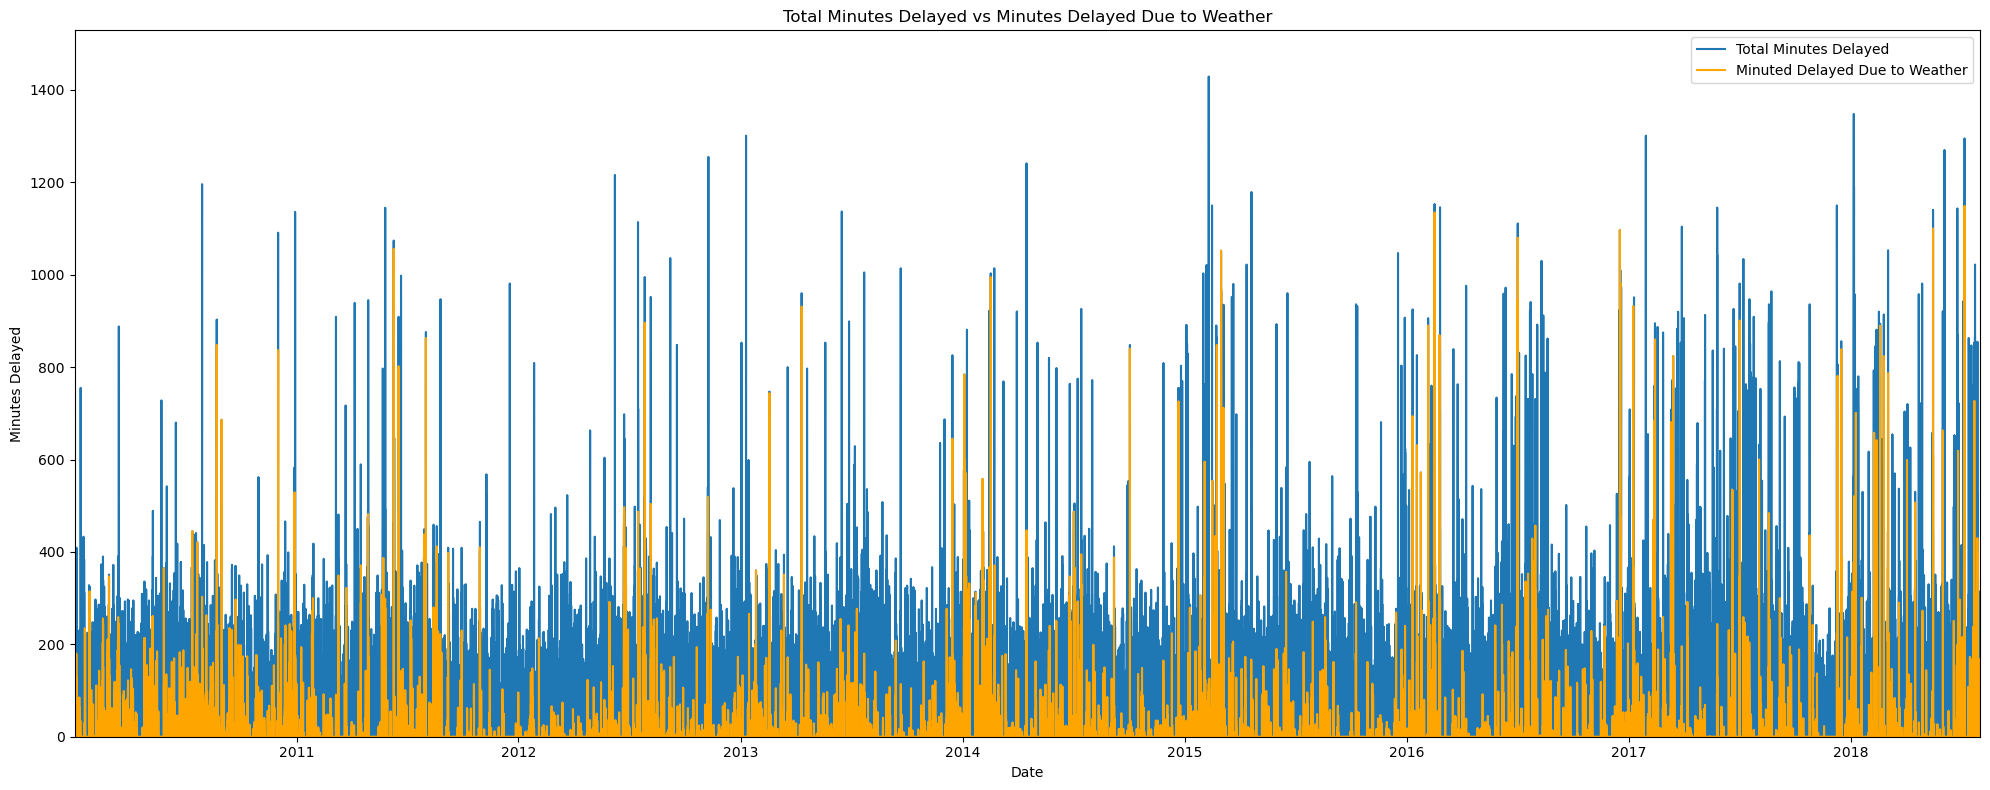

In [267]:
# TODO Have a look at the correlations between these two features
plt.figure(figsize=(20,8))
plt.plot(merged_df['DEP_DATE_TIME_HOURLY'], merged_df['DEP_DELAY_NEW'],label='Total Minutes Delayed')
plt.plot(merged_df['DEP_DATE_TIME_HOURLY'], merged_df['WEATHER_DELAY'],color='orange',label='Minuted Delayed Due to Weather')

plt.xlim(min(merged_df['DEP_DATE_TIME_HOURLY']), max(merged_df['DEP_DATE_TIME_HOURLY']))
plt.ylim(0,max(merged_df['DEP_DELAY_NEW'])+100)
plt.legend()
plt.title("Total Minutes Delayed vs Minutes Delayed Due to Weather")
plt.ylabel("Minutes Delayed")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

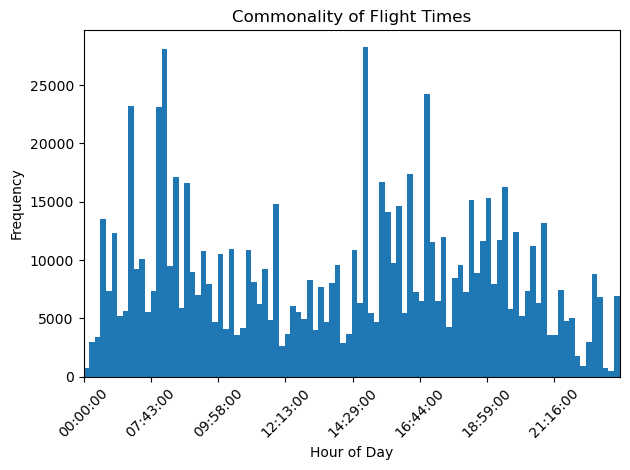

In [268]:
ax = plt.axes()

# 15 minute intervals
plt.hist(sorted(merged_df['CRS_DEP_TIME']),bins=96)

plt.title("Commonality of Flight Times")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")

ax.set_xticks([i for i in range(0, len(merged_df['CRS_DEP_TIME'].unique()), 135)])
plt.xticks(rotation=45)
plt.xlim("00:00:00","23:59:59")
plt.tight_layout()

plt.show()

In [269]:
print(f"Percentage of flights that departed early or on time: {(merged_df['DEP_DELAY_GROUP'] <= 0).sum() / len(merged_df):4.4f}")
for i in range(1, 13):
    print(f"Percentage of flights delayed by more than {i*15} minutes: {(merged_df['DEP_DELAY_GROUP'] >= i).sum() / len(merged_df):4.4f}")
print(f"Percentage of flights cancelled: {(merged_df['CANCELLED'] == 1).sum() / len(merged_df):4.4f}")



Percentage of flights that departed early or on time: 0.8393
Percentage of flights delayed by more than 15 minutes: 0.1607
Percentage of flights delayed by more than 30 minutes: 0.1302
Percentage of flights delayed by more than 45 minutes: 0.1007
Percentage of flights delayed by more than 60 minutes: 0.0771
Percentage of flights delayed by more than 75 minutes: 0.0597
Percentage of flights delayed by more than 90 minutes: 0.0468
Percentage of flights delayed by more than 105 minutes: 0.0372
Percentage of flights delayed by more than 120 minutes: 0.0298
Percentage of flights delayed by more than 135 minutes: 0.0240
Percentage of flights delayed by more than 150 minutes: 0.0195
Percentage of flights delayed by more than 165 minutes: 0.0159
Percentage of flights delayed by more than 180 minutes: 0.0130
Percentage of flights cancelled: 0.0231


In [270]:
# Remove cancelled flights with delay group != 0
merged_df = merged_df[((merged_df['CANCELLED'] == 1) & (merged_df['DEP_DELAY_GROUP'] == 0)) | (merged_df['CANCELLED'] == 0)]
merged_df

,DEP_DATE_TIME_HOURLY,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,...,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 06:00:00,JFK,LAX,06:25:00,06:27:00,2.0,0.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
1,2010-01-01 06:00:00,JFK,SJU,06:25:00,06:29:00,4.0,0.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
2,2010-01-01 06:00:00,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
3,2010-01-01 06:00:00,JFK,MCO,06:30:00,06:39:00,9.0,0.0,0.0,9.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
4,2010-01-01 06:00:00,JFK,BQN,06:00:00,05:52:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 23:00:00,JFK,BUF,22:45:00,22:35:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838849,2018-07-31 23:00:00,JFK,BTV,22:45:00,23:35:00,50.0,3.0,0.0,8.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838850,2018-07-31 23:00:00,JFK,ROC,22:55:00,22:47:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838851,2018-07-31 23:00:00,JFK,BOS,22:55:00,22:54:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0


## Breakdown of flights by month within the dataset
Clear that since 2018 data only includes January to July we have more flight data for the first half of the year

Question is should we drop all of 2018 to make the dataset balanced?

In [271]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [272]:
# Extract the month from the time column and store it in a new temporary column
merged_df['MONTH'] = merged_df['DEP_DATE_TIME_HOURLY'].dt.month

# Filter the DataFrame to include only delayed flights
delayed_flights = merged_df[merged_df['DEP_DELAY_GROUP'] > 0]

# Group by month and count the number of delayed flights
monthly_delays = delayed_flights.groupby('MONTH').size()
monthly_flights = merged_df.groupby('MONTH').size()

/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_32711/4217087830.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['MONTH'] = merged_df['DEP_DATE_TIME_HOURLY'].dt.month


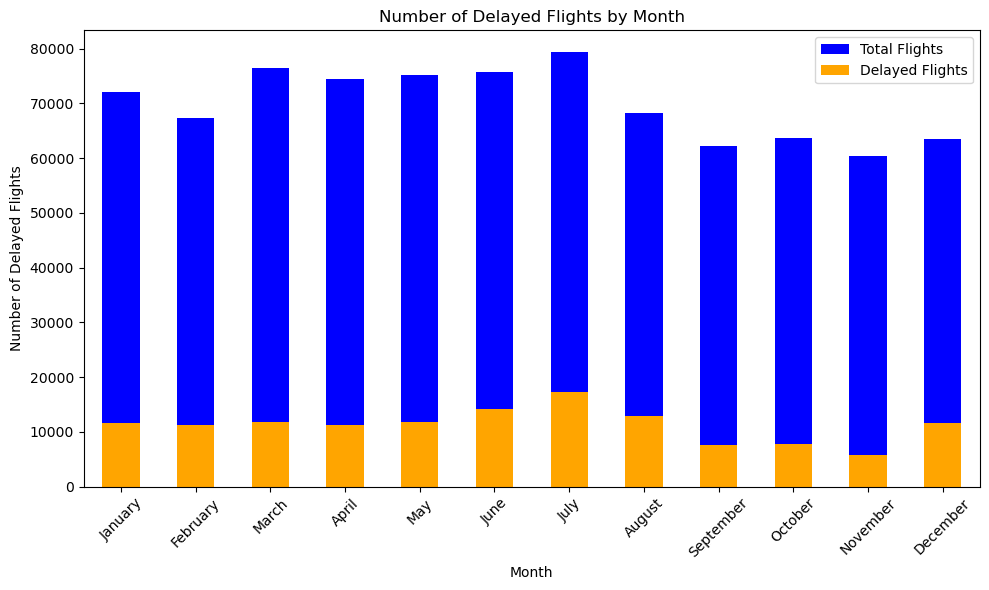

In [273]:
# Plot the bar chart
plt.figure(figsize=(10, 6))

monthly_flights.plot(kind='bar', color='blue',label='Total Flights')
monthly_delays.plot(kind='bar', color='orange',label='Delayed Flights')

plt.legend()
plt.title('Number of Delayed Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Delayed Flights')
plt.xticks(ticks=range(0, 12), labels=[months[i] for i in range(0, 12)], rotation=45)
plt.tight_layout()
plt.show()

In [274]:
# Compute the percentage of delayed flights for each month
percentage_delays_per_month = (monthly_delays / monthly_flights) * 100

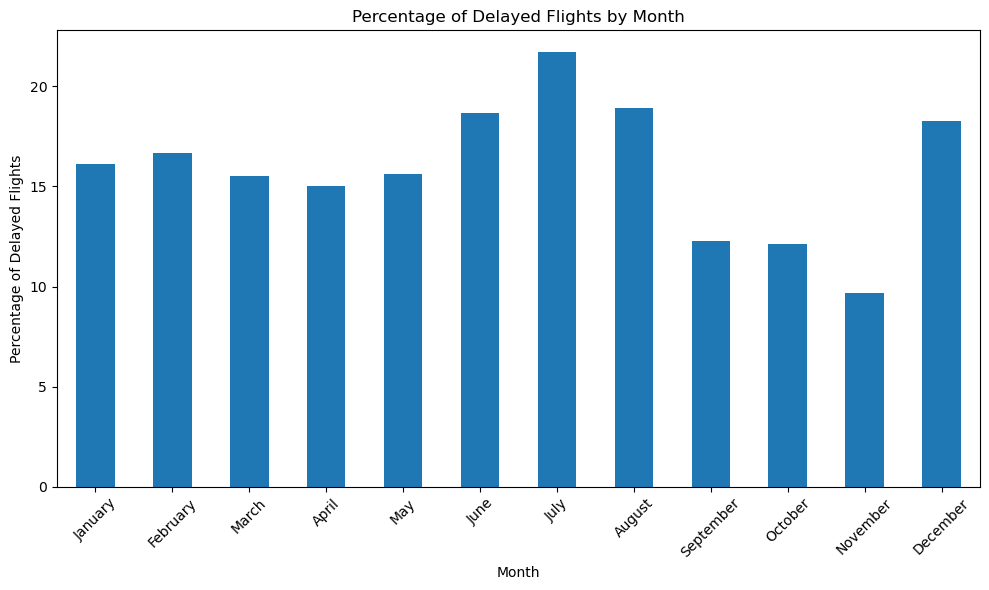

In [275]:
# Plot the normalized bar chart
plt.figure(figsize=(10, 6))

percentage_delays_per_month.plot(kind='bar')

plt.title('Percentage of Delayed Flights by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Delayed Flights')
plt.xticks(ticks=range(0, 12), labels=[months[i] for i in range(0, 12)], rotation=45)
plt.tight_layout()
plt.show()

After normalising the results to account for the inbalance of data in the latter half of the year. We see that the summer months do infact have the most delays, and not the ones with poorer weather. Now need to look at the reasons for delay and confirm that most delays are not due to weather. It is likely that more people are travelling during the summer, meaning more air traffic and potential for chain delays.

In [276]:
# Define the delay reasons
delay_reasons = ['CANCELLED','WEATHER_DELAY', 'SECURITY_DELAY','CARRIER_DELAY', 'NAS_DELAY', 'LATE_AIRCRAFT_DELAY']

# Initialize a DataFrame to hold the percentage of each type of delay by month
percentage_delays_per_reason = pd.DataFrame(index=monthly_flights.index)

# Calculate the percentage of each type of delay for each month
for reason in delay_reasons:
    if reason == 'CANCELLED':
        delayed_flights_per_reason = merged_df[merged_df[reason] == 1].groupby('MONTH').size()
    else:
        delayed_flights_per_reason = merged_df[merged_df[reason] > 0].groupby('MONTH').size()
    percentage_delays_per_reason[reason] = (delayed_flights_per_reason / monthly_flights) * 100

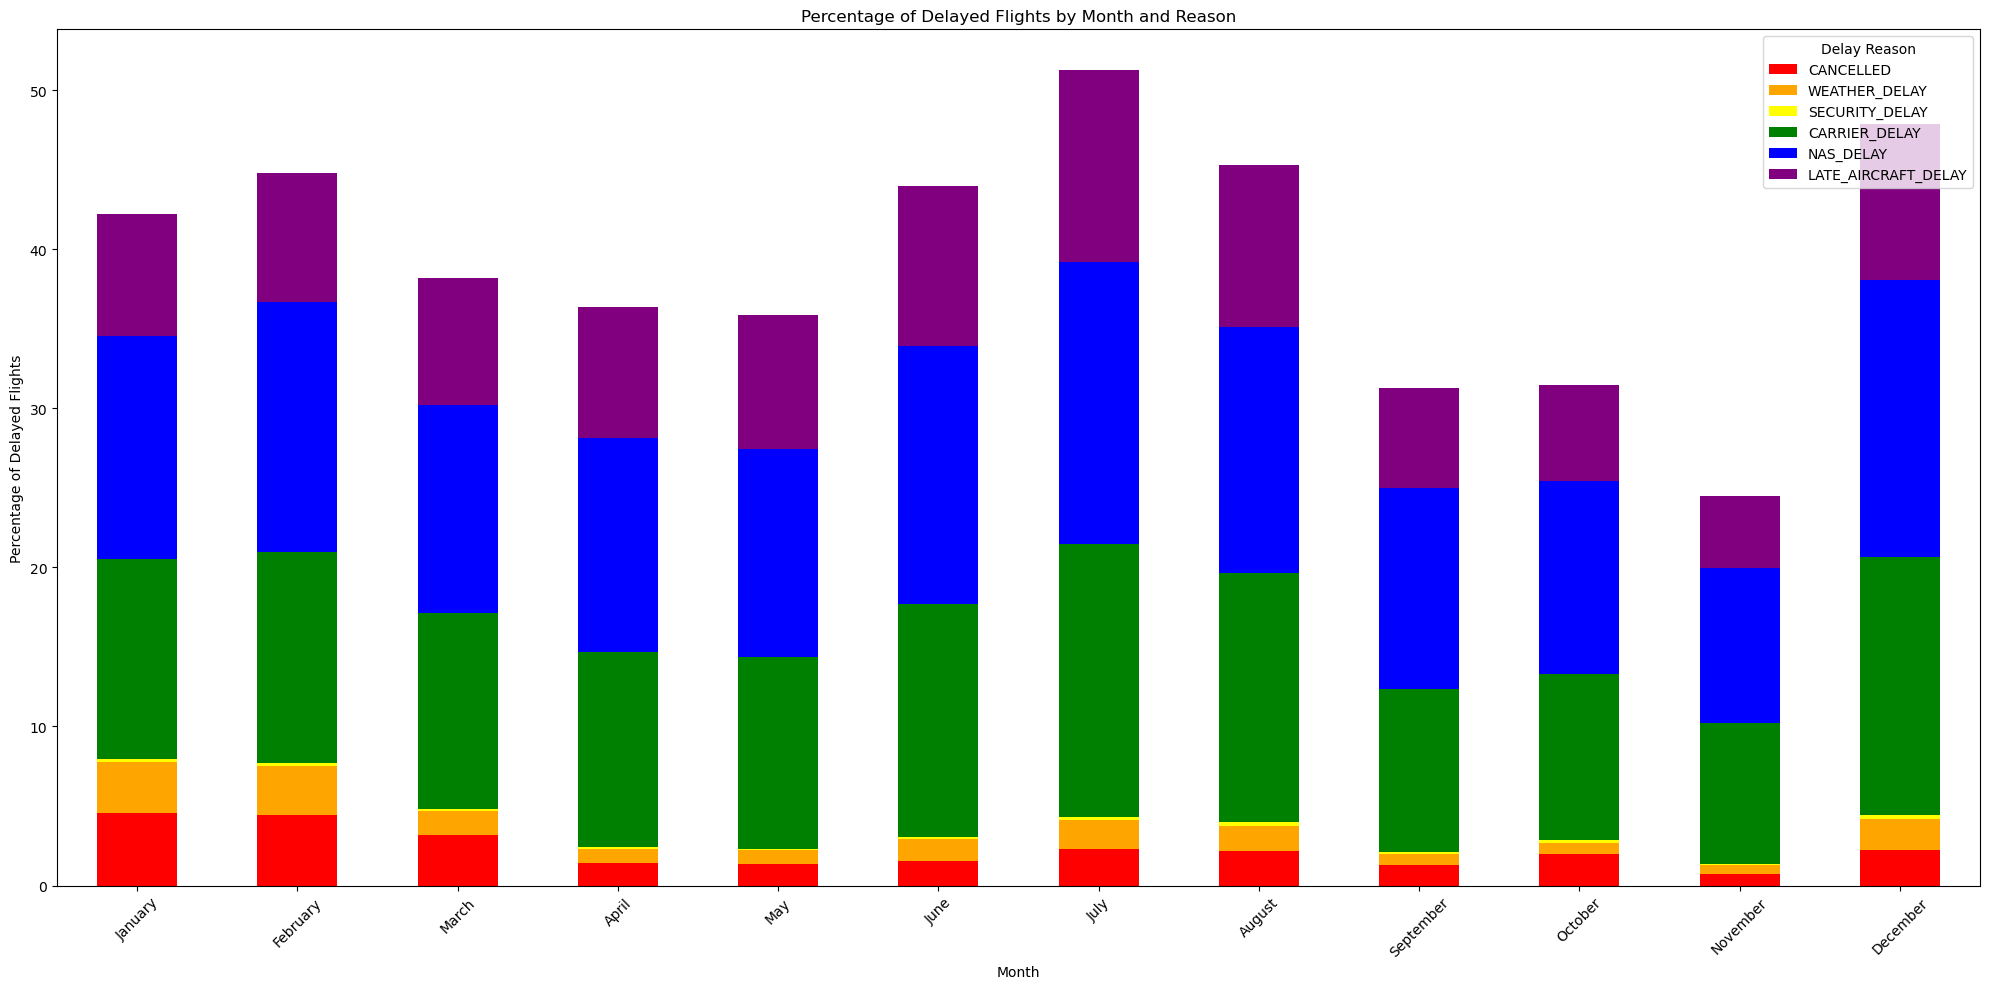

In [277]:
# Plot the stacked bar chart
percentage_delays_per_reason.plot(kind='bar', stacked=True, figsize=(20, 10), color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'])

plt.title('Percentage of Delayed Flights by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Percentage of Delayed Flights')
plt.legend(title='Delay Reason')
plt.xticks(ticks=range(0, 12), labels=[months[i] for i in range(0, 12)], rotation=45)
plt.tight_layout()
plt.show()

As Suspected Weather only causes a very small fraction of delays, however it does become significantly more impactful in the winter months.

In [278]:
# Can now remove the month column
merged_df.drop(columns=['MONTH'], inplace=True)
merged_df

/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_32711/2440905810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop(columns=['MONTH'], inplace=True)


,DEP_DATE_TIME_HOURLY,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,...,HOURLYWindSpeed,HOURLYStationPressure,HOURLYSeaLevelPressure,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons
0,2010-01-01 06:00:00,JFK,LAX,06:25:00,06:27:00,2.0,0.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
1,2010-01-01 06:00:00,JFK,SJU,06:25:00,06:29:00,4.0,0.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
2,2010-01-01 06:00:00,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
3,2010-01-01 06:00:00,JFK,MCO,06:30:00,06:39:00,9.0,0.0,0.0,9.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
4,2010-01-01 06:00:00,JFK,BQN,06:00:00,05:52:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.95,29.97,0.0,29.97,0.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 23:00:00,JFK,BUF,22:45:00,22:35:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838849,2018-07-31 23:00:00,JFK,BTV,22:45:00,23:35:00,50.0,3.0,0.0,8.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838850,2018-07-31 23:00:00,JFK,ROC,22:55:00,22:47:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0
838851,2018-07-31 23:00:00,JFK,BOS,22:55:00,22:54:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.01,30.03,0.0,30.03,0.0,1.0,1,0,0


In [279]:
# Convert 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF' and 'HOURLYDewPointTempF' values from farhenheit to celsius
merged_df['HOURLYDRYBULBTEMPC'] = (merged_df['HOURLYDRYBULBTEMPF'] - 32) * 5/9
merged_df['HOURLYWETBULBTEMPC'] = (merged_df['HOURLYWETBULBTEMPF'] - 32) * 5/9
merged_df['HOURLYDewPointTempC'] = (merged_df['HOURLYDewPointTempF'] - 32) * 5/9

# Drop the original columns
merged_df.drop(columns=['HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF', 'HOURLYDewPointTempF'], inplace=True)

merged_df


/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_32711/1660816136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['HOURLYDRYBULBTEMPC'] = (merged_df['HOURLYDRYBULBTEMPF'] - 32) * 5/9
/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_32711/1660816136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['HOURLYWETBULBTEMPC'] = (merged_df['HOURLYWETBULBTEMPF'] - 32) * 5/9
/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_32711/1660816136.py:4: SettingWithCopyW

,DEP_DATE_TIME_HOURLY,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,...,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPC,HOURLYDewPointTempC
0,2010-01-01 06:00:00,JFK,LAX,06:25:00,06:27:00,2.0,0.0,0.0,0.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
1,2010-01-01 06:00:00,JFK,SJU,06:25:00,06:29:00,4.0,0.0,0.0,0.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
2,2010-01-01 06:00:00,JFK,ATL,06:00:00,05:57:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
3,2010-01-01 06:00:00,JFK,MCO,06:30:00,06:39:00,9.0,0.0,0.0,9.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
4,2010-01-01 06:00:00,JFK,BQN,06:00:00,05:52:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 23:00:00,JFK,BUF,22:45:00,22:35:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.03,0.0,1.0,1,0,0,22.222222,21.666667,21.666667
838849,2018-07-31 23:00:00,JFK,BTV,22:45:00,23:35:00,50.0,3.0,0.0,8.0,0.0,...,0.0,30.03,0.0,1.0,1,0,0,22.222222,21.666667,21.666667
838850,2018-07-31 23:00:00,JFK,ROC,22:55:00,22:47:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.03,0.0,1.0,1,0,0,22.222222,21.666667,21.666667
838851,2018-07-31 23:00:00,JFK,BOS,22:55:00,22:54:00,0.0,-1.0,0.0,0.0,0.0,...,0.0,30.03,0.0,1.0,1,0,0,22.222222,21.666667,21.666667


In [280]:
# Show only 'DEP_DATE_TIME_HOURLY','CRS_DEP_TIME','DEP_TIME','DEP_DATE_TIME','DATE' columns
merged_df[['DEP_DATE_TIME_HOURLY','CRS_DEP_TIME','DEP_TIME','DEP_DATE_TIME','DATE']]
merged_df.drop(columns=['DEP_DATE_TIME_HOURLY','CRS_DEP_TIME','DATE'], inplace=True)

/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_32711/2139774568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.drop(columns=['DEP_DATE_TIME_HOURLY','CRS_DEP_TIME','DATE'], inplace=True)


In [281]:
# Move DEP_DATE_TIME and DEP_TIME to the front
col_data = merged_df.pop("DEP_DATE_TIME")
merged_df.insert(0, "DEP_DATE_TIME", col_data)
col_data = merged_df.pop("DEP_TIME")
merged_df.insert(1, "DEP_TIME", col_data)

# Rename DEP_TIME to ACC_DEP_TIME
merged_df.rename(columns={'DEP_TIME': 'ACC_DEP_TIME'}, inplace=True)
merged_df

/var/folders/02/b6cwjcqx2qnf9pnf5z938x6w0000gp/T/ipykernel_32711/3475028592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns={'DEP_TIME': 'ACC_DEP_TIME'}, inplace=True)


,DEP_DATE_TIME,ACC_DEP_TIME,ORIGIN,DEST,DEP_DELAY_NEW,DEP_DELAY_GROUP,CANCELLED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,...,HOURLYPrecip,HOURLYAltimeterSetting,HOURLYWindDirectionSin,HOURLYWindDirectionCos,HOURLYPressureTendencyIncr,HOURLYPressureTendencyDecr,HOURLYPressureTendencyCons,HOURLYDRYBULBTEMPC,HOURLYWETBULBTEMPC,HOURLYDewPointTempC
0,2010-01-01 06:25:00,06:27:00,JFK,LAX,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
1,2010-01-01 06:25:00,06:29:00,JFK,SJU,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
2,2010-01-01 06:00:00,05:57:00,JFK,ATL,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
3,2010-01-01 06:30:00,06:39:00,JFK,MCO,9.0,0.0,0.0,9.0,0.0,13.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
4,2010-01-01 06:00:00,05:52:00,JFK,BQN,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,29.97,0.0,1.0,0,1,0,0.555556,0.000000,-0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838848,2018-07-31 22:45:00,22:35:00,JFK,BUF,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,30.03,0.0,1.0,1,0,0,22.222222,21.666667,21.666667
838849,2018-07-31 22:45:00,23:35:00,JFK,BTV,50.0,3.0,0.0,8.0,0.0,0.0,...,0.0,30.03,0.0,1.0,1,0,0,22.222222,21.666667,21.666667
838850,2018-07-31 22:55:00,22:47:00,JFK,ROC,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,30.03,0.0,1.0,1,0,0,22.222222,21.666667,21.666667
838851,2018-07-31 22:55:00,22:54:00,JFK,BOS,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,30.03,0.0,1.0,1,0,0,22.222222,21.666667,21.666667


In [ ]:
# Removing 'early' classification
merged_df.loc[merged_df['DEP_DELAY_GROUP'] == -1, 'DEP_DELAY_GROUP'] = 0

In [ ]:
# Extract time-related features from `DEP_DATE_TIME`
merged_df['DEP_HOUR'] = merged_df['DEP_DATE_TIME'].dt.hour
merged_df['DEP_DAY'] = merged_df['DEP_DATE_TIME'].dt.day
merged_df['DEP_MONTH'] = merged_df['DEP_DATE_TIME'].dt.month
merged_df['DEP_WEEKDAY'] = merged_df['DEP_DATE_TIME'].dt.weekday

In [ ]:
# Convert DEP_DELAY_NEW, DEP_DELAY_GROUP, CANCELLED, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY and LATE_AIRCRAFT_DELAY to int
merged_df['DEP_DELAY_NEW'] = merged_df['DEP_DELAY_NEW'].astype(int)
merged_df['DEP_DELAY_GROUP'] = merged_df['DEP_DELAY_GROUP'].astype(int)
merged_df['CANCELLED'] = merged_df['CANCELLED'].astype(int)
merged_df['CARRIER_DELAY'] = merged_df['CARRIER_DELAY'].astype(int)
merged_df['WEATHER_DELAY'] = merged_df['WEATHER_DELAY'].astype(int)
merged_df['NAS_DELAY'] = merged_df['NAS_DELAY'].astype(int)
merged_df['SECURITY_DELAY'] = merged_df['SECURITY_DELAY'].astype(int)
merged_df['LATE_AIRCRAFT_DELAY'] = merged_df['LATE_AIRCRAFT_DELAY'].astype(int)
merged_df.info()

In [292]:
# Reindex the DataFrame to ensure that the columns are in the correct order
merged_df = merged_df.reset_index(drop=True)

RangeIndex(start=0, stop=838702, step=1)


In [ ]:
merged_df.to_csv('merged_df.csv', index=False)